In [1]:
import os
import subprocess
import xugrid as xu
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import animation
import contextily as cx
#import 
%matplotlib inline

### Hurrywave

In [ ]:
base_dir = r'p:\11204750-hurrywave\02_modelling\f998dcs13\04_modelruns\extended_nobnd'

model_dir = os.path.join(r'p:\11204750-hurrywave\02_modelling\f998dcs13\04_modelruns\extended_nobnd')

### Post-process Hurrywave results

In [3]:
### Post-process Hurrywave results
# Get the results from the netcdf file

nc_file = os.path.join(model_dir,'hurrywave_map.nc')
his_file = os.path.join(model_dir,'hurrywave_his.nc')

output_dir =  os.path.join(base_dir, r'4_postprocessing\HW')

if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok= True)

xu_nc = xu.open_dataset(nc_file , decode_times=True)

modig = {"msk": xu_nc["msk"],
         "zb": xu_nc["zb"],
         "Hm0": xu_nc["hm0"],
         #"Hm0_max": xu_nc["hm0max"],
         "Tp": xu_nc["tp"],
         "DIR": xu_nc["wavdir"],
         "ds": xu_nc["dirspr"],
         #"windspeed": xu_nc["windspeed"]
        }

# Assuming "time" is available in modig dictionary
time_variable =  xu_nc["time"]

xu_nc.close()

his = xu.open_dataset(his_file)
his = his.assign_coords({"stations": [x.decode("utf-8").strip() for x in his.station_name.values]})



In [5]:
bnd = pd.read_csv(r'p:\11204750-hurrywave\02_modelling\f998dcs13\04_modelruns\extended\hurrywave.bnd', header=0, sep=' ', names=['x', 'y'])
bnd = np.array(bnd)

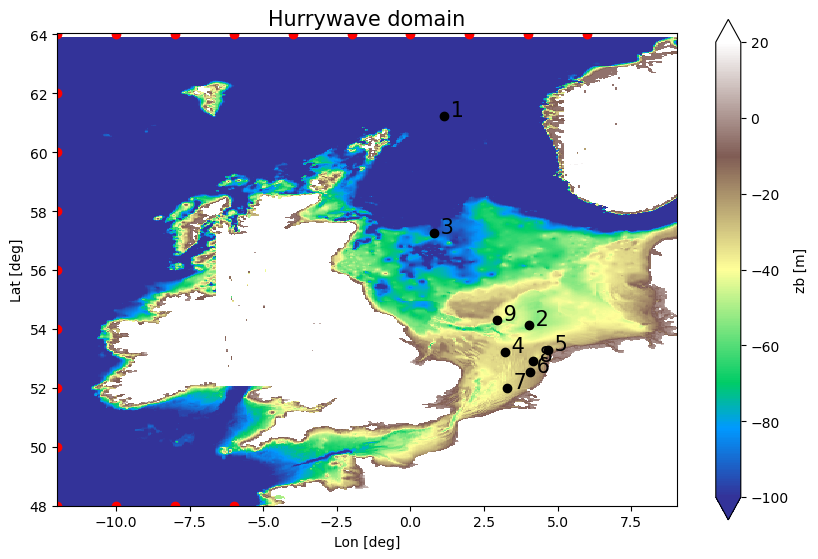

In [ ]:
# plot bed level - Hurrywave
fig, ax = plt.subplots(figsize=(10, 6.5), ncols=1, nrows=1, sharex=True, sharey=True)

im = modig['zb'].plot(ax =ax,
                 x="x",
                 y="y",
                 cmap = "terrain",
                 vmin = -100, vmax = 20,
                 cbar_kwargs={'label': 'zb [m]'})

plt.scatter(his.station_x, his.station_y, color='k')
for x, y, id in zip(his.station_x.values, his.station_y.values, his.station_id.values):
    plt.text(x, y, ' ' + '{:.0f}'.format(id), color='k', fontsize=15)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Hurrywave domain', fontsize = 15)

# ax.set_xticklabels([x for x in ax.get_xticks()])  # divide every tick value by 1000
# ax.set_yticklabels([y/1e3 for y in ax.get_yticks()])  # divide every tick value by 1000
ax.set_xlabel('Lon [deg]')
ax.set_ylabel('Lat [deg]')

plt.scatter(bnd[:, 0], bnd[:, 1], color='red')
#xu_nc["zs"][1].ugrid.plot(ax=ax, cmap='gray')

fig.savefig(r'p:\11204750-hurrywave\02_modelling\f998dcs13\05_postprocessing\bathy3.png', dpi=300, bbox_inches='tight')


We can plot other variables on this map, such as the maximum significant waveheight (Hm0_max)

Animation of the hurricane track (Check your output folder for the results!)

In [14]:
modig["Hm0"]

<xarray.DataArray 'hm0' (time: 337, n: 481, m: 421)>
[68242837 values with dtype=float32]
Coordinates:
    x        (n, m) float32 ...
    y        (n, m) float32 ...
  * time     (time) datetime64[ns] 2013-12-01 2013-12-01T00:30:00 ... 2013-12-08
Dimensions without coordinates: n, m
Attributes:
    units:          m
    standard_name:  sea_surface_wave_significant_height
    long_name:      Significant wave height Hm0 (m)

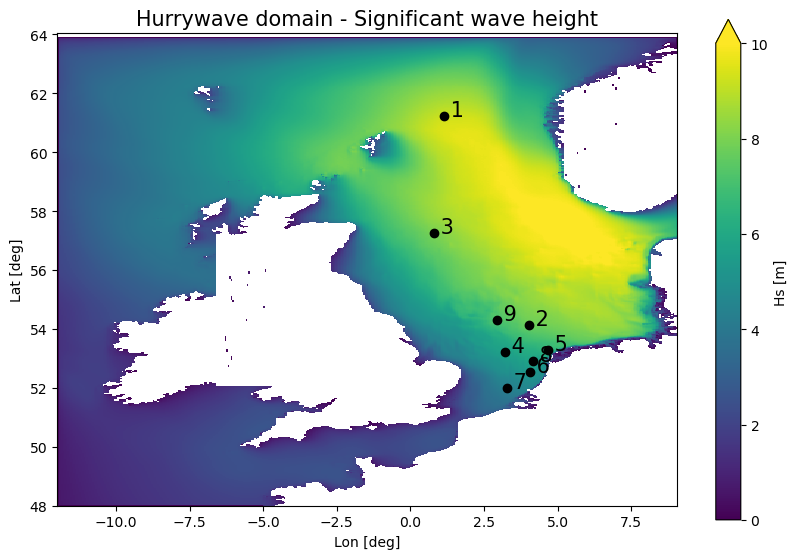

In [ ]:
# plot wave height - Hurrywave
fig, ax = plt.subplots(figsize=(10, 6.5), ncols=1, nrows=1, sharex=True, sharey=True)

im = modig['Hm0'].isel(time=-97).plot(ax =ax,
                 x="x",
                 y="y",
                 cmap = "viridis",
                 vmin = 0, vmax = 10,
                 cbar_kwargs={'label': 'Hs [m]'})

plt.scatter(his.station_x, his.station_y, color='k')
for x, y, id in zip(his.station_x.values, his.station_y.values, his.station_id.values):
    plt.text(x, y, ' ' + '{:.0f}'.format(id), color='k', fontsize=15)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Hurrywave domain - Significant wave height', fontsize = 15)

# ax.set_xticklabels([x for x in ax.get_xticks()])  # divide every tick value by 1000
# ax.set_yticklabels([y/1e3 for y in ax.get_yticks()])  # divide every tick value by 1000
ax.set_xlabel('Lon [deg]')
ax.set_ylabel('Lat [deg]') 

#plt.scatter(bnd[:, 0], bnd[:, 1], color='red')
#xu_nc["zs"][1].ugrid.plot(ax=ax, cmap='gray')

fig.savefig(r'p:\11204750-hurrywave\02_modelling\f998dcs13\05_postprocessing\waveheight3.png', dpi=300, bbox_inches='tight')

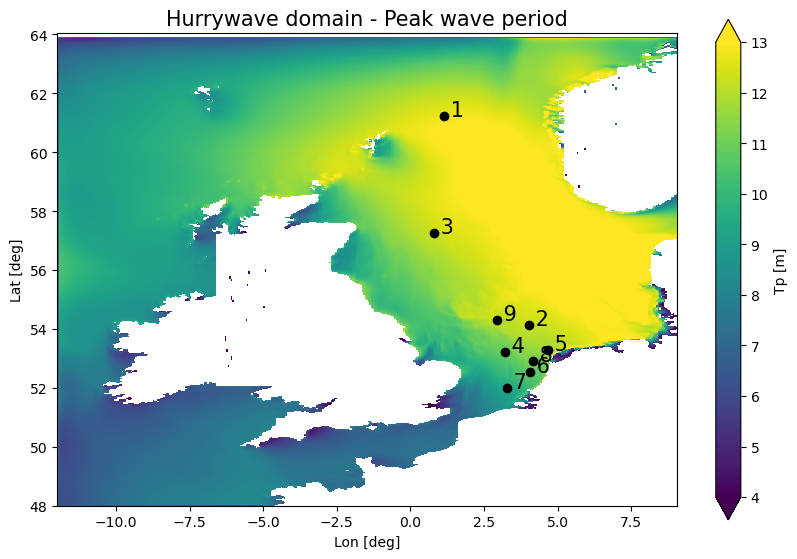

In [ ]:
# plot wave period - Hurrywave
fig, ax = plt.subplots(figsize=(10, 6.5), ncols=1, nrows=1, sharex=True, sharey=True)

im = modig['Tp'].isel(time=-97).plot(ax =ax,
                 x="x",
                 y="y",
                 cmap = "viridis",
                 vmin = 4, vmax = 13,
                 cbar_kwargs={'label': 'Tp [m]'})

plt.scatter(his.station_x, his.station_y, color='k')
for x, y, id in zip(his.station_x.values, his.station_y.values, his.station_id.values):
    plt.text(x, y, ' ' + '{:.0f}'.format(id), color='k', fontsize=15)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Hurrywave domain - Peak wave period', fontsize = 15)

# ax.set_xticklabels([x for x in ax.get_xticks()])  # divide every tick value by 1000
# ax.set_yticklabels([y/1e3 for y in ax.get_yticks()])  # divide every tick value by 1000
ax.set_xlabel('Lon [deg]')
ax.set_ylabel('Lat [deg]')

# plt.scatter(bnd[:, 0], bnd[:, 1], color='red')
#xu_nc["zs"][1].ugrid.plot(ax=ax, cmap='gray')

fig.savefig(r'p:\11204750-hurrywave\02_modelling\f998dcs13\05_postprocessing\wave_period3.png', dpi=300, bbox_inches='tight')

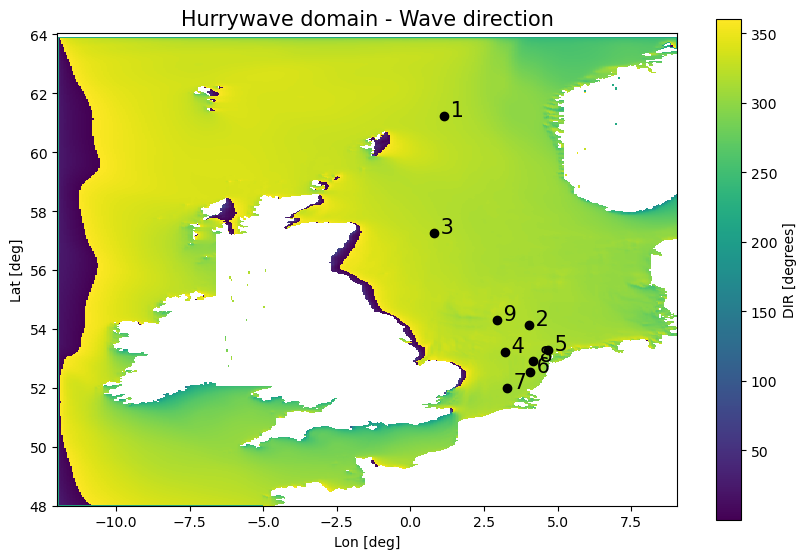

In [ ]:
# plot wave direction - Hurrywave
fig, ax = plt.subplots(figsize=(10, 6.5), ncols=1, nrows=1, sharex=True, sharey=True)

im = modig['DIR'].isel(time=-97).plot(ax =ax,
                 x="x",
                 y="y",
                 cmap = "viridis",
                 cbar_kwargs={'label': 'DIR [degrees]'})

plt.scatter(his.station_x, his.station_y, color='k')
for x, y, id in zip(his.station_x.values, his.station_y.values, his.station_id.values):
    plt.text(x, y, ' ' + '{:.0f}'.format(id), color='k', fontsize=15)

ax.set_aspect('equal', adjustable='box')
ax.set_title('Hurrywave domain - Wave direction', fontsize = 15)

# ax.set_xticklabels([x for x in ax.get_xticks()])  # divide every tick value by 1000
# ax.set_yticklabels([y/1e3 for y in ax.get_yticks()])  # divide every tick value by 1000
ax.set_xlabel('Lon [deg]')
ax.set_ylabel('Lat [deg]')

# plt.scatter(bnd[:, 0], bnd[:, 1], color='red')
#xu_nc["zs"][1].ugrid.plot(ax=ax, cmap='gray')

fig.savefig(r'p:\11204750-hurrywave\02_modelling\f998dcs13\05_postprocessing\direction3.png', dpi=300, bbox_inches='tight')

In [22]:
modig

{'msk': <xarray.DataArray 'msk' (n: 481, m: 421)>
 [202501 values with dtype=float32]
 Coordinates:
     x        (n, m) float32 ...
     y        (n, m) float32 ...
 Dimensions without coordinates: n, m
 Attributes:
     units:          -
     standard_name:  land_binary_mask
     long_name:      msk_active_cells
     description:    inactive=0, active=1, boundary=2,
 'zb': <xarray.DataArray 'zb' (n: 481, m: 421)>
 [202501 values with dtype=float32]
 Coordinates:
     x        (n, m) float32 ...
     y        (n, m) float32 ...
 Dimensions without coordinates: n, m
 Attributes:
     units:          m
     standard_name:  altitude
     long_name:      bed_level_above_reference_level,
 'Hm0': <xarray.DataArray 'hm0' (time: 337, n: 481, m: 421)>
 [68242837 values with dtype=float32]
 Coordinates:
     x        (n, m) float32 ...
     y        (n, m) float32 ...
   * time     (time) datetime64[ns] 2013-12-01 2013-12-01T00:30:00 ... 2013-12-08
 Dimensions without coordinates: n, m
 Attribu